# Assignment 01 Naive Bayes 
## Group 01 Manuel, Marc Nauendorf, Florian Domino (195136)

In [14]:
import pandas as pd
from naive_bayes import NaiveBayes
import matplotlib.pyplot as plt
import seaborn as sns

## load data

In [15]:
data = pd.read_csv("../Assignment_1/inflammation_diagnosis.csv", sep=";")
data.head()


,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [16]:
# Rename columns with mask for consistent access later
#data = data['temperature;nausea;lumbar_pain;urine_pushing;micturition_pains;burning_of_urethra;inflammation;nephritis'].str.split(';', expand=True)
data.columns = ['temperature', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_of_urethra', 'inflammation', 'nephritis']

# Replace 'yes' with True and 'no' with False for the target columns
data.replace({'yes': True, 'no': False}, inplace=True)
data.head()

C:\Users\marcn\AppData\Local\Temp\ipykernel_18076\4008546055.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'yes': True, 'no': False}, inplace=True)


,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,False,True,False,False,False,False,False
1,35.9,False,False,True,True,True,True,False
2,35.9,False,True,False,False,False,False,False
3,36.0,False,False,True,True,True,True,False
4,36.0,False,True,False,False,False,False,False


In [17]:
data["disease"] = (data["inflammation"] | (data["nephritis"])).astype(bool)

data = data.drop(columns=["inflammation", "nephritis"])

data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,disease
0,35.5,False,True,False,False,False,False
1,35.9,False,False,True,True,True,True
2,35.9,False,True,False,False,False,False
3,36.0,False,False,True,True,True,True
4,36.0,False,True,False,False,False,False


In [18]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Verify that there’s no overlap in indexes between train and test sets
print("No overlap between train and test sets:", train_data.index.isin(test_data.index).sum() == 0)

# Separate features and target for training and test sets
X_train = train_data.drop(columns=['disease'])
y_train = train_data['disease']
X_test = test_data.drop(columns=['disease'])
y_test = test_data['disease']

No overlap between train and test sets: True


### Naive Bayes

In [19]:
# declare which features are continuous
continuous_features = [True, False, False, False, False, False]
nb = NaiveBayes(continuous=continuous_features)

nb.fit(pd.concat([X_train, y_train], axis=1),target_name="disease")

In [20]:
accuracy, confusion_matrix = nb.evaluate_on_data(X_test, y_test)

print("Test Accuracy: ", accuracy)
print("Confusion Matrix:\n", confusion_matrix)


Test Accuracy:  1.0
Confusion Matrix:
        False  True 
False      6      0
True       0     18


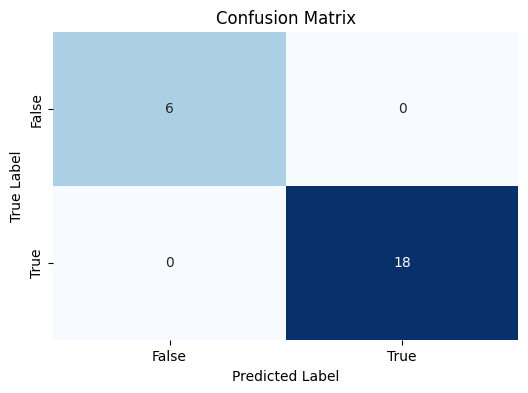

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [22]:
# Print the confusion matrix -> Vorlesung 29.10
data.describe()


,temperature
count,120.000000
mean,38.724167
std,1.819132
min,35.500000
25%,37.100000
50%,37.950000
75%,40.600000
max,41.500000


<Axes: >

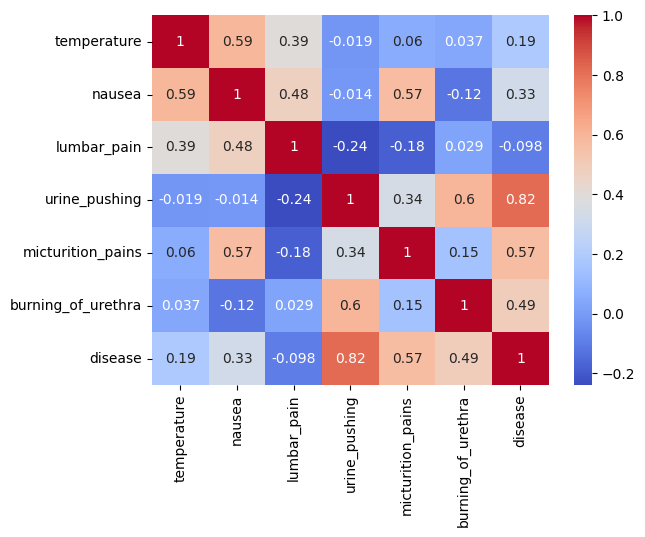

In [23]:
# Berechne die Korrelationsmatrix für die Daten
corr_matrix = data.corr()

# Erstelle ein Heatmap-Diagramm der Korrelationsmatrix
# Die Heatmap visualisiert die Korrelationen zwischen den verschiedenen Merkmalen in den Daten.
# 'annot=True' zeigt die Korrelationswerte in den Zellen an.
# 'cmap='coolwarm'' verwendet eine Farbskala von Blau (negative Korrelation) bis Rot (positive Korrelation).
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


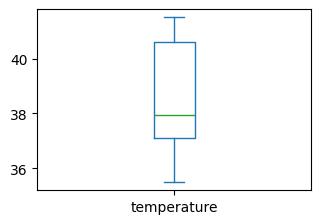

In [24]:
# Boxplot
# Ein Boxplot zeigt die Verteilung der Daten für jedes Merkmal.
# 'kind='box'' gibt an, dass ein Boxplot erstellt werden soll.
# 'subplots=True' erstellt für jedes Merkmal ein separates Diagramm.
# 'layout=(3, 3)' arrangiert die Diagramme in einem 3x3-Raster.
# 'figsize=(12, 8)' legt die Größe der gesamten Abbildung fest.
data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8))
plt.show()


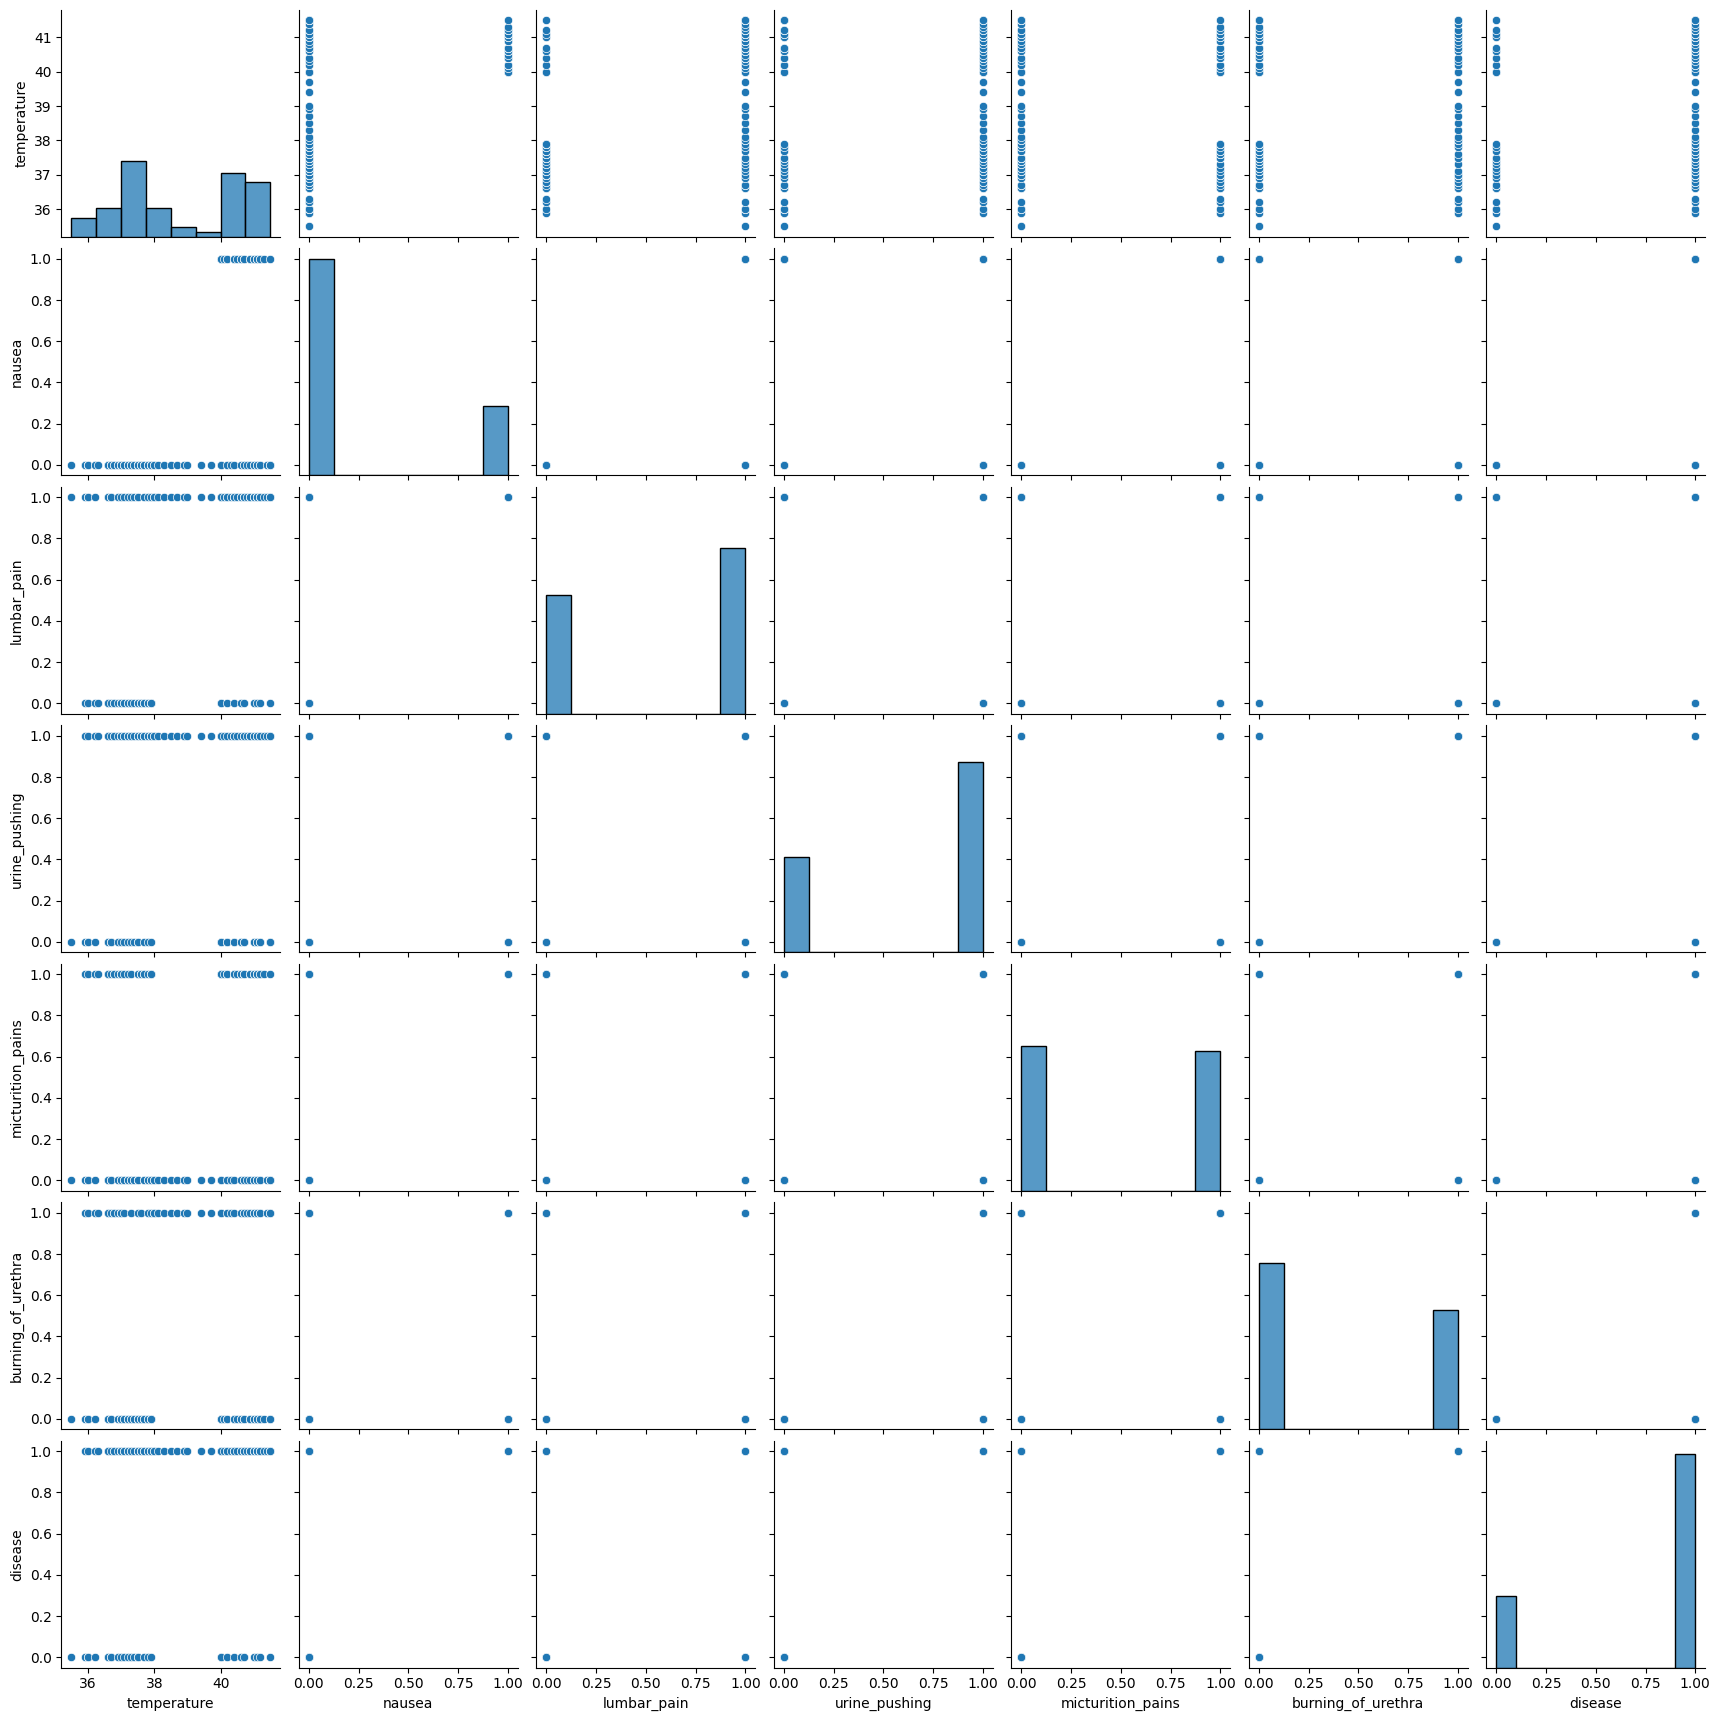

In [25]:
# Alternative Darstellungsmoeglichkeiten

# Pairplot
# Ein Pairplot zeigt die Verteilungen und Beziehungen zwischen den Merkmalen in den Daten.
# Es erstellt Streudiagramme für jede Paarung von Merkmalen und Histogramme für die Verteilungen der einzelnen Merkmale.
sns.pairplot(data)
plt.show()

C:\Users\marcn\AppData\Local\Temp\ipykernel_18076\1425422224.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['disease'] == True]['temperature'], label='Disease', shade=True)
C:\Users\marcn\AppData\Local\Temp\ipykernel_18076\1425422224.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['disease'] == False]['temperature'], label='No Disease', shade=True)


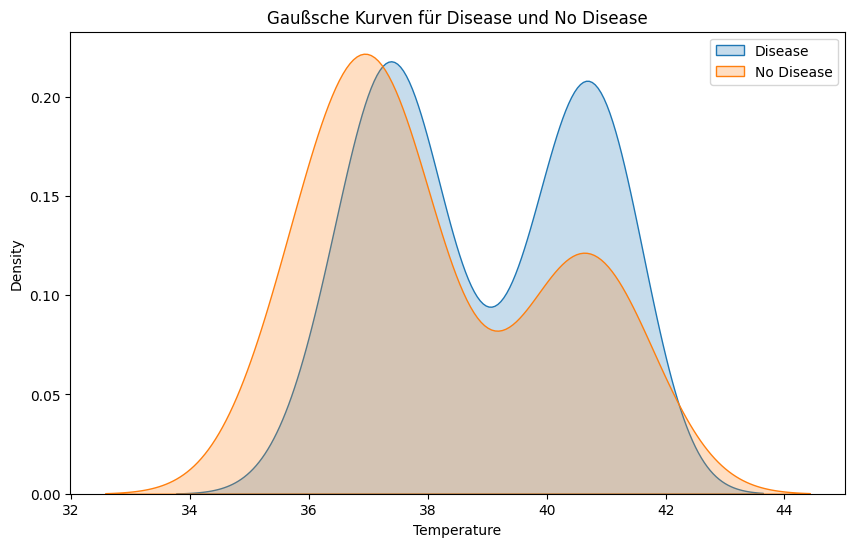

In [26]:
# Plotten der Gaußschen Kurven für "disease" und "no disease"
plt.figure(figsize=(10, 6))

# Gaußsche Kurve für "disease"
# KDE-Plot (Kernel Density Estimate) für die Temperaturwerte, wenn 'disease' True ist
sns.kdeplot(data[data['disease'] == True]['temperature'], label='Disease', shade=True)

# Gaußsche Kurve für "no disease"
# KDE-Plot (Kernel Density Estimate) für die Temperaturwerte, wenn 'disease' False ist
sns.kdeplot(data[data['disease'] == False]['temperature'], label='No Disease', shade=True)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Gaußsche Kurven für Disease und No Disease')
plt.xlabel('Temperature')
plt.ylabel('Density')

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()